### Importing some libraries and functions for preprocessing the text

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

### Importing IMDb Movie Reviews dataset

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


#### Dataset exploration


In [4]:
df.shape

(50000, 2)

In [5]:
df.isnull().values.any()

False

In [9]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

#### Distribution of positive / negative sentiments in dataset

<Axes: xlabel='sentiment', ylabel='count'>

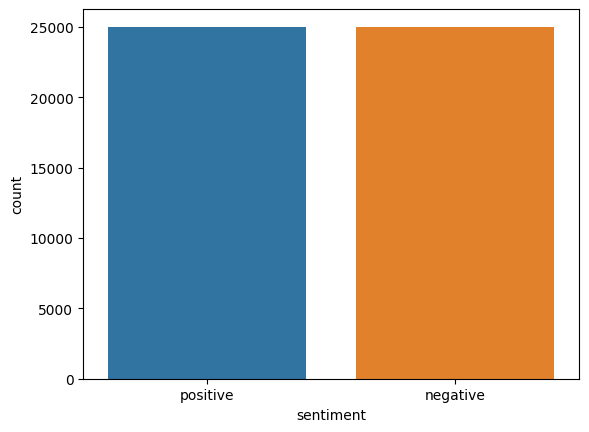

In [6]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [12]:
for i in range(2):
    print("Review number -",i+1)
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")
# our text contains punctuations, brackets, HTML tags and numbers 

Review number - 1
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

## 1)TOKENIZING

### 1.1)TOKENIZING WORDS

In [13]:
from nltk.tokenize import word_tokenize

tokenize_words = word_tokenize(df['review'].iloc[3])
for i in range(len(tokenize_words)):
    print('WORD',(i+1), '-', tokenize_words[i])
#     print('\n')
print("\nTotal words in 4th review : ")
print(len(tokenize_words))

WORD 1 - Basically
WORD 2 - there
WORD 3 - 's
WORD 4 - a
WORD 5 - family
WORD 6 - where
WORD 7 - a
WORD 8 - little
WORD 9 - boy
WORD 10 - (
WORD 11 - Jake
WORD 12 - )
WORD 13 - thinks
WORD 14 - there
WORD 15 - 's
WORD 16 - a
WORD 17 - zombie
WORD 18 - in
WORD 19 - his
WORD 20 - closet
WORD 21 - &
WORD 22 - his
WORD 23 - parents
WORD 24 - are
WORD 25 - fighting
WORD 26 - all
WORD 27 - the
WORD 28 - time.
WORD 29 - <
WORD 30 - br
WORD 31 - /
WORD 32 - >
WORD 33 - <
WORD 34 - br
WORD 35 - /
WORD 36 - >
WORD 37 - This
WORD 38 - movie
WORD 39 - is
WORD 40 - slower
WORD 41 - than
WORD 42 - a
WORD 43 - soap
WORD 44 - opera
WORD 45 - ...
WORD 46 - and
WORD 47 - suddenly
WORD 48 - ,
WORD 49 - Jake
WORD 50 - decides
WORD 51 - to
WORD 52 - become
WORD 53 - Rambo
WORD 54 - and
WORD 55 - kill
WORD 56 - the
WORD 57 - zombie.
WORD 58 - <
WORD 59 - br
WORD 60 - /
WORD 61 - >
WORD 62 - <
WORD 63 - br
WORD 64 - /
WORD 65 - >
WORD 66 - OK
WORD 67 - ,
WORD 68 - first
WORD 69 - of
WORD 70 - all
WORD 71 - w

### 1.2)TOKENIZING SENTENCES

In [15]:
from nltk.tokenize import sent_tokenize

tokenize_sent = sent_tokenize(df['review'].iloc[3])
print("Total sentences in 4th review : ")
print(len(tokenize_sent))
for i in range(len(tokenize_sent)):
    print('\nSENTENCE NUMBER -',(i+1))
    print(tokenize_sent[i])

Total sentences in 4th review : 
6

SENTENCE NUMBER - 1
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama!

SENTENCE NUMBER - 2
As a drama the movie is watchable.

SENTENCE NUMBER - 3
Parents are divorcing & arguing like in real life.

SENTENCE NUMBER - 4
And then we have Jake with his closet which totally ruins all the film!

SENTENCE NUMBER - 5
I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs.

SENTENCE NUMBER - 6
As for the shots with Jake: just ignore them.


### 2) LEMMATIZATION

In [16]:
#Lemmatiztion:Converts allverb forms into root word
print("Lemmatiztion:Converts allverb forms into root word:")
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
print(lem.lemmatize("better", pos="a"))
# print("\n")

Lemmatiztion:Converts allverb forms into root word:
good


#### TO LOWERCASE

In [20]:
sentence = df['review'].iloc[0].lower()
sentence

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

#### REMOVING TAGS

In [21]:
import re
RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''
    return RE.sub('', text)

In [22]:
sentence = remove_tags(sentence)
sentence

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

#### REMOVING PUNCTUATIONS

In [23]:
sentence = re.sub('[^a-zA-Z]', ' ', sentence)
sentence

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

#### REMOVING SINGLE CHARACTERS

In [24]:
sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
sentence

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn

#### REMOVING EXTRA SPACES

In [25]:
sentence = re.sub(r'\s+', ' ', sentence)
sentence

'one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare forget pretty picture

## 3) REMOVING STOPWORDS

In [26]:
import nltk
from nltk.corpus import stopwords
print('STOPWORDS IN ENG ARE: ')
print(stopwords.words('english'))

STOPWORDS IN ENG ARE: 
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

In [27]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(sentence)

filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(filtered_sentence)

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'audiences', 'forget', 'charm', 'for

In [28]:
sentence = " ".join(filtered_sentence)

#### PREPROCESSING TEXT

In [29]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [30]:
X = []
sentences = list(df['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

### PREPROCESSED REVIEW

In [35]:
X[0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [36]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['sentiment']=lb.fit_transform(df['sentiment'])
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

## 4) COUNT VECTORIZER

In [49]:
# X[1]

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done '

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(X)
x

<50000x101227 sparse matrix of type '<class 'numpy.int64'>'
	with 4835219 stored elements in Compressed Sparse Row format>

In [51]:
y=df['sentiment']

In [52]:
from keras.utils import np_utils
npy=np_utils.to_categorical(y)
print(npy[:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,npy,test_size=.25)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(37500, 101227)
(12500, 101227)
(37500, 2)
(12500, 2)


#### Neural Network architecture

In [59]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model = Sequential()
model.add(Dense(units=16,activation='relu', input_dim=101227))
model.add(Dense(units=2,activation='sigmoid'))


#### Model compiling

In [60]:
model.compile(optimizer= 'Adam', loss='categorical_crossentropy',metrics=['accuracy'])

#### Model Summary

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                1619648   
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,619,682
Trainable params: 1,619,682
Non-trainable params: 0
_________________________________________________________________


#### Model Training

In [63]:
model.fit(x_train,y_train, epochs=6, verbose=1)

Epoch 1/6
1172/1172 [==============================] - 46s 39ms/step - loss: 0.1695 - accuracy: 0.9422
Epoch 2/6
1172/1172 [==============================] - 48s 41ms/step - loss: 0.0260 - accuracy: 0.9905
Epoch 3/6
1172/1172 [==============================] - 47s 40ms/step - loss: 0.0078 - accuracy: 0.9971
Epoch 4/6
1172/1172 [==============================] - 45s 38ms/step - loss: 0.0038 - accuracy: 0.9982
Epoch 5/6
1172/1172 [==============================] - 46s 39ms/step - loss: 0.0027 - accuracy: 0.9985
Epoch 6/6
1172/1172 [==============================] - 49s 41ms/step - loss: 0.0023 - accuracy: 0.9987


#### Predictions on the test set

In [66]:
score = model.evaluate(x_test, y_test, verbose=1)

391/391 [==============================] - 4s 3ms/step - loss: 1.6456 - accuracy: 0.8558


#### Model Performance

In [67]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 1.6455516815185547
Test Accuracy: 0.8558400273323059


In [71]:
y_pred=model.predict(x_test)
y_pred

391/391 [==============================] - 3s 1ms/step


array([[1.0000000e+00, 4.1813292e-16],
       [5.0350440e-01, 7.3942523e-03],
       [3.5185720e-05, 9.9999887e-01],
       ...,
       [4.8841251e-09, 4.2094564e-01],
       [9.9995327e-01, 3.7326370e-03],
       [6.5750079e-03, 3.1662695e-03]], dtype=float32)

In [72]:
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
y_pred,y_test

(array([0, 0, 1, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 1, 1, 1], dtype=int64))

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix (y_test,y_pred))
print(classification_report(y_pred,y_test))

0.85584
[[5367  960]
 [ 842 5331]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6209
           1       0.86      0.85      0.86      6291

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500

